In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [180]:
df = pd.read_csv('Boats_Cleaned_dataset.csv')

In [181]:
df.head()

,Unnamed: 0,id,type,boatClass,make,model,year,condition,length_ft,beam_ft,...,minEngineYear,engineCategory,price,sellerId,city,state,zip,created_date,created_month,created_year
0,1,7252689,power,power-center,Aquasport,210 CC,1992,used,21.0,8.50,...,NaN,outboard-4s,16500.0,217053,Englewood,FL,34224,2019-10-16,10,2019
1,3,7228300,power,power-sportcruiser,Formula,400 Super Sport,2018,used,40.0,11.00,...,2018.0,inboard-outboard,539000.0,44260,Harsens Island,MI,48028,2019-09-24,9,2019
2,5,7271336,power,power-deck,Bayliner,Element 180,2020,new,18.0,7.42,...,2019.0,outboard-4s,26995.0,220570,Marietta,OH,45750,2019-11-02,11,2019
3,6,7222952,power,power-expresscruiser,Regal,32 Express,2015,used,32.0,10.33,...,NaN,multiple,169995.0,34834,North Charleston,SC,29405,2019-09-19,9,2019
4,8,6824832,power,power-aft,Carver,440 Aft Cabin Motor Yacht,1994,used,44.0,15.00,...,1994.0,inboard,109900.0,17942,Middle River,MD,21220,2018-08-29,8,2018


In [68]:
# mean = df['dryWeight_lb'].mean()
# df['dryWeight_lb'].fillna(mean,inplace=True)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18903 entries, 0 to 18902
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      18903 non-null  int64  
 1   id              18903 non-null  int64  
 2   type            18903 non-null  object 
 3   boatClass       18903 non-null  object 
 4   make            18903 non-null  object 
 5   model           18868 non-null  object 
 6   year            18903 non-null  int64  
 7   condition       18903 non-null  object 
 8   length_ft       18903 non-null  float64
 9   beam_ft         12399 non-null  float64
 10  dryWeight_lb    7094 non-null   float64
 11  hullMaterial    18903 non-null  object 
 12  fuelType        15951 non-null  object 
 13  numEngines      18903 non-null  int64  
 14  totalHP         18055 non-null  float64
 15  maxEngineYear   2205 non-null   float64
 16  minEngineYear   2174 non-null   float64
 17  engineCategory  8410 non-null  

In [119]:
df.isnull().sum()

Unnamed: 0            0
id                    0
type                  0
boatClass             0
make                  0
model                35
year                  0
condition             0
length_ft             0
beam_ft            6504
dryWeight_lb      11809
hullMaterial          0
fuelType           2952
numEngines            0
totalHP             848
maxEngineYear     16698
minEngineYear     16729
engineCategory    10493
price                 0
sellerId              0
city                 56
state                 0
zip                8688
created_date          0
created_month         0
created_year          0
dtype: int64

In [120]:
df.columns

Index(['Unnamed: 0', 'id', 'type', 'boatClass', 'make', 'model', 'year',
       'condition', 'length_ft', 'beam_ft', 'dryWeight_lb', 'hullMaterial',
       'fuelType', 'numEngines', 'totalHP', 'maxEngineYear', 'minEngineYear',
       'engineCategory', 'price', 'sellerId', 'city', 'state', 'zip',
       'created_date', 'created_month', 'created_year'],
      dtype='object')

In [121]:
df.describe()

,Unnamed: 0,id,year,length_ft,beam_ft,dryWeight_lb,numEngines,totalHP,maxEngineYear,minEngineYear,price,sellerId,created_month,created_year
count,18903.000000,1.890300e+04,18903.000000,18903.000000,12399.00000,7094.000000,18903.000000,18055.000000,2205.000000,2174.000000,1.890300e+04,18903.000000,18903.000000,18903.000000
mean,9782.042216,6.947263e+06,2013.145956,23.803935,16.19693,4754.142697,1.069513,112.849006,2007.927438,2007.919503,6.471469e+05,49891.652225,6.945511,2018.503465
std,5749.171393,4.820519e+05,10.502989,14.613329,36.83357,11626.382266,0.425528,286.137591,12.429153,12.462496,7.309567e+07,60725.592092,3.007115,1.093103
min,1.000000,4.449130e+05,1910.000000,1.000000,0.08000,8.000000,0.000000,0.000000,1938.000000,1938.000000,5.000000e+02,1003.000000,1.000000,2003.000000
25%,4783.500000,6.895201e+06,2011.000000,18.000000,7.83000,1175.000000,1.000000,0.000000,2001.000000,2001.000000,1.925500e+04,10550.000000,5.000000,2018.000000
50%,9603.000000,7.061616e+06,2019.000000,21.000000,8.50000,2001.000000,1.000000,0.000000,2012.000000,2012.000000,3.419500e+04,34482.000000,8.000000,2019.000000
75%,14718.500000,7.179152e+06,2019.000000,25.000000,9.00000,3375.000000,1.000000,115.000000,2019.000000,2019.000000,5.783000e+04,53226.000000,9.000000,2019.000000
max,20000.000000,7.271336e+06,2020.000000,375.000000,1311.00000,440000.000000,4.000000,7200.000000,2020.000000,2020.000000,1.000000e+10,269557.000000,12.000000,2019.000000


In [182]:
mean = df['dryWeight_lb'].mean()
df['dryWeight_lb'].fillna(mean,inplace=True)
print(df['dryWeight_lb'])

0         3000.000000
1        16100.000000
2         2000.000000
3        12650.000000
4        32000.000000
             ...     
18898     4754.142697
18899     2795.000000
18900     4754.142697
18901     4754.142697
18902     6350.000000
Name: dryWeight_lb, Length: 18903, dtype: float64


In [183]:
mean = df['price'].mean()
df['price'].fillna(mean,inplace=True)
print(df['price'])

0         16500.0
1        539000.0
2         26995.0
3        169995.0
4        109900.0
           ...   
18898     31973.0
18899     26995.0
18900     39995.0
18901     16900.0
18902     17900.0
Name: price, Length: 18903, dtype: float64


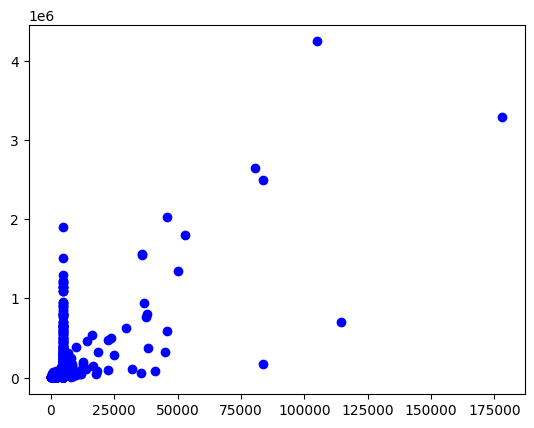

In [205]:
X=df.loc[:3000:,'dryWeight_lb'].values
y = df.loc[:3000:,'price'].values

plt.scatter(X,y,color='b')

In [206]:
X.shape

(3001,)

In [207]:
y.shape

(3001,)

In [208]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)





In [198]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25)



In [199]:
X_test.reshape(-1,1)


array([[4754.14269665],
       [4754.14269665],
       [4754.14269665],
       ...,
       [4754.14269665],
       [4754.14269665],
       [2610.        ]])

In [200]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

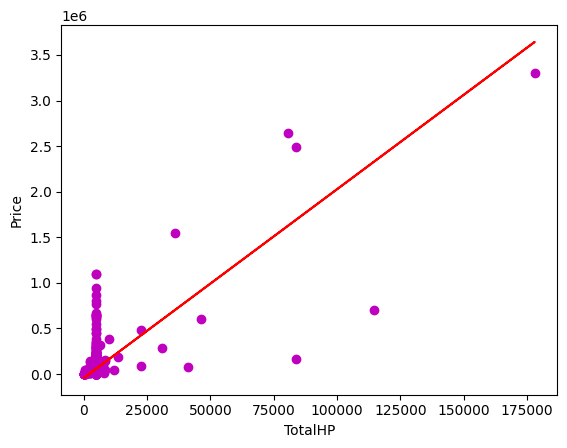

In [201]:
y_pred = model.predict(X_test)

plt.scatter(X_test,y_test,color='m')
plt.plot(X_test,y_pred,color='r')

plt.xlabel('TotalHP')
plt.ylabel('Price')
plt.show()

In [209]:
print(f"The price of a boat with dryWeight_lb of 25000: {model.predict([[25000]])}")

The price of a boat with dryWeight_lb of 25000: [[474033.18277014]]


In [210]:
score = model.score(X_test, y_test)
score

0.4581516904177697

In [211]:

mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [212]:
print("Mean Square Error:", mse)
print("R-squared:", r2)

Mean Square Error: 8520898642.804606
R-squared: 0.4581516904177697
